# Курс по машинному обучению,   ВМК МГУ
# Основы numpy + matplotlib + pandas

### О задании

Задание состоит из трех частей, посвященных работе с табличными данными с помощью библиотеки **pandas**, визуализации с помощью библиотек **matplotlib**, **seaborn**, **plotly** и векторным вычислениям с помощью библиотеки **numpy**. Вам предлагается выполнить несколько заданий. 

# Часть 1. Pandas

В этой части мы познакомимся с библиотекой **pandas**. **Pandas** — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера.

С помощью встроенных инструментов **pandas** можно легко:
- считывать табличные данные (в форматах csv, json, xlsx)
- представлять собственные данные в виде таблиц и сохранять их
- считать статистики 
- визулизировать данные 
- производить обработку данных
- и много всего еще...

Основные объекты в **pandas**:

* **Series** (серия) — одномерная структура данных, в которой каждый элемент имеет свой индекс.
* **DataFrame** (датафрейм) - табличная структура данных, представляющая собой таблицу с именованными колонками различных типов и индексами строк.


Полезные материалы:
1. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html)
2. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Далее потребуется выполнить несколько небольших заданий, покрывающих базовый функционал библиотеки. 

### Важно!

* **Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования</font>.**

* **Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Не забывайте, что можно гуглить и что-то искать на stackoverflow, например.**

* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**

* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**
* **Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком (?)**

In [5]:
import pandas as pd

Загрузите датасет с платформы kaggle по [ссылке](https://www.kaggle.com/shivamb/netflix-shows).

#### Задание 1 (0.4 балла).
* **(0.2 балла)** Откройте файл с таблицей и выведите последние 5 строк.
* **(0.2 балла)** **(?)** Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк и столбцов?

Полезные материалы: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html 

In [6]:
data = pd.read_csv("netflix_titles.csv")

In [7]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**Ответ**: Данные из себя представляют подробные данные о сериалах или фильмах на Netflix. В таблице всего:

*   8807(индексация с нуля) строк-телепрограмм(сериалы, фильмы, документальные и.т.д.)
*   12 столбцов таких, как:
    *   ID (show_id),
    *   Тип (type),   
    *   Название (title),
    *   Директор (director),
    *   Актёры (cast),
    *   Страна (country),
    *   Дата добавления (date_added),
    *   Год выпуска (release_year),
    *   Рейтинг (rating),
    *   Длительность (duration),
    *   Жанры (listed_in),
    *   Описание (description),


#### Задание 2 (0.6 балла). Ответьте на вопросы:
* **(0.2 балла)** **(?)** Сколько представлено уникальных категорий рейтинга? (колонка rating)
* **(0.2 балла)** **(?)** Сколько объектов каждого типа попало в таблицу? (колонка type)
* **(0.2 балла)** **(?)**  Какой минимальный год релиза для объектов, попавших в таблицу? (колонка release_year)

Базовый функционал, необxодимый для решения, можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html).

In [8]:
data['rating'].nunique()
data['type'].value_counts()
min(data['release_year'])
#data['release_year'][data['release_year'].idxmin()]

1925

**Ответ**: 
1. 17
2. Movie: 6131, TV Show: 2676
3. 1925

#### Задание 3 (0.6 балла)

**(0.2 балл)** **(?)** Есть ли в данных пропуски? В каких колонках? 

Про работу с пропущенными значениями можно прочитать [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

In [9]:
for i in data:
  nan_filter = pd.isna(data[i])
  if len(data[nan_filter]) > 0:
    print(i)

director
cast
country
date_added
rating
duration


**Ответ**: Да, есть в следующих колонках:
  *   director
  *   cast
  *   country
  *   date_added
  *   rating
  *   duration



**(0.2 балла)** Заполните пропуски пустой строкой для всех колонок, где кол-во отсутствующих значений > 500. Для проверки корректности после замены выведите кол-во пропусков во всех столбцах и общее кол-во строк в таблице.

In [10]:
for i in data:
  nan_filter = pd.isna(data[i])
  if len(data[nan_filter]) > 500:
    data[i] = data[i].fillna('')
    
print(f'Total rows: {len(data)}')
for i in data:
  nan_filter = pd.isna(data[i])
  print(i, len(data[nan_filter]))

Total rows: 8807
show_id 0
type 0
title 0
director 0
cast 0
country 0
date_added 10
release_year 0
rating 4
duration 3
listed_in 0
description 0


**(0.2 балла)** Удалите строки с оставшимися отсутствующими значениями. Для проверки корректности после замены выведите кол-во пропусков во всех столбцах и общее кол-во строк в таблице.

In [11]:
data = data.dropna()

print(f'Total rows: {len(data)}')
for i in data:
  nan_filter = pd.isna(data[i])
  print(i, len(data[nan_filter]))

Total rows: 8790
show_id 0
type 0
title 0
director 0
cast 0
country 0
date_added 0
release_year 0
rating 0
duration 0
listed_in 0
description 0


#### Задание 4 (0.6 балла). Посмотрите на колонку date_added
* **(0.3 балла)(?)** Какого она типа? Измените тип колонки на datetime. Покажите, что после изменения колонка действительно имеет тип datetime.
* **(0.3 балла)(?)** В какой год на сайт было добавлено больше всего объектов?

Полезные материалы: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 

In [12]:
type_date_added = data['date_added'].dtypes
print(f'date_added column type: {type_date_added}')
data['date_added'] = pd.to_datetime(data['date_added'])
new_type_date_added = data['date_added'].dtypes
print(f'date_added column type: {new_type_date_added}')
pd.DatetimeIndex(data['date_added']).year.value_counts().head(3)

date_added column type: object
date_added column type: datetime64[ns]


2019    2016
2020    1879
2018    1648
Name: date_added, dtype: int64

**Ответ**: date_added column type: object\
В 2019 году больше всего объектов(2016) было добавлено на сайт.\
На втором месте 2020. В 2020 было добавлено 1879 объектов.\
На третьем месте 2018. В 2018 было добавлено 1648 объектов.


#### Задание 5 (0.5 балла). Посмотрите на колонку duration.
* **(0.2 балла) (?)** В каких единицах измеряется длительность для каждого типа объекта? (колонка type)

In [13]:
data.filter(items=['type','duration'])

,type,duration
0,Movie,90 min
1,TV Show,2 Seasons
2,TV Show,1 Season
3,TV Show,1 Season
4,TV Show,2 Seasons
...,...,...
8802,Movie,158 min
8803,TV Show,2 Seasons
8804,Movie,88 min
8805,Movie,88 min


**Ответ**: Длительность TV Show измеряется в сезонах(seasons).\
Длительность Movie измеряется в минутах(min).

* **(0.3 балла)** Преобразуйте колонку так, чтобы осталось только число, убрав единицы измерения. Покажите, что после изменения колонка меет тип int. Выведите новые значения колонки duration в первых 5 строках. 

Для этого может помочь функция-преобразования [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). 

In [14]:
print(data['duration'].dtypes)
data['duration'] = data['duration'].str.extract('(\d+)', expand=False)
data['duration'] = pd.to_numeric(data['duration'])
data['duration'].head(5)

object


0    90
1     2
2     1
3     1
4     2
Name: duration, dtype: int64

#### Задание 6 (0.4 балла).
* **(?)** Какие 5 сериалов (в колонке type значениe TV Show) наиболее продолжительны (колонка duration)? В качестве ответа привидите названия (колонка title) нужных сериалов отосртированных по убыванию продолжительности. В случае одинаковой длительности отсортировать значения по возрастанию года релиза (колонка release_year).

Для решения воспользуйтесь функцией [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [15]:
tv_show_filter = data['type']=='TV Show'
data[tv_show_filter].sort_values(by=['duration','release_year'],ascending=[False,True]).head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
4798,s4799,TV Show,NCIS,,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
1354,s1355,TV Show,Heartland,,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
4220,s4221,TV Show,COMEDIANS of the world,,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...


**Ответ**: 

1.   Grey's Anatomy
2.   NCIS
3.   Supernatural
4.   Heartland
5.   COMEDIANS of the world



#### Задание 7 (0.4 балла).
* **(?)** Сколько сериалов (в колонке type значениe TV Show), выпущенных в 2018 году (колонка release_year), имеют рейтинг TV-MA (колонка rating)? 
Постарайтесь сделать решение в одну строку, используя для выбора строк несколько условий, объединяя их с помощью | вместо or, & вместо and и ~ вместо not.

In [16]:
print(len(data[(data['type']=='TV Show') & (data['rating']=='TV-MA') & (data['release_year']==2018)]))

191


**Ответ**: 191

#### Задание 8 (0.5 балла). 
* **(?)** Какая средняя продолжительность фильмов (в колонке type значениe Movie) в году для 2010-2015 годов (колонка release_year)? Для решения необходимо воспользоваться функцией [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

In [17]:
data[(data['type']=='TV Show') & (data['release_year']<=2015) & (data['release_year'] >= 2010)].groupby(['release_year']).mean()

,duration
release_year,
2010,1.641026
2011,1.350000
2012,1.825397
2013,1.655738
2014,1.568182
2015,1.660377


**Ответ**:

*   **2010:** 1.641026
*   **2011:** 1.35
*   **2012:** 1.825397
*   **2013:** 1.655738
*   **2014:** 1.568182
*   **2015:** 1.660377



#### Задание 9 (0.7  балла).  Предположим, что в 2021 году вышел 16 сезон сериала "Supernatural", но даные в таблице еще не успели обновить. Обновите нужные поля в соотвествующей строке. Будем считать, что дата выхода сериала в таблице соответствует выходу последнего сезона. Дату добавления на сайт можете выбрать произвольно. Выведите строку с исправленными полями.  Проверьте, что тип колонки date_added остался datetime.

Обратите внимание, что при выборе полей с помощью оператора индексирования \[\] возвращается копия выбранных значений. При попытке присвоить таким образом новые значения для некоторых полей таблицы, будет выдано предупреждение. Более надежный способ - использовать операторы loc и iloc. Подробнее про индексацию и выбор строк можно прочитать [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [18]:
filter = data['title'].str.fullmatch('Supernatural')
data.loc[filter, 'duration'] = 16
data.loc[filter, 'release_year'] = 2021
data.loc[filter, 'date_added'] = pd.to_datetime(['2021-10-16'], utc=False)
data['date_added'] = pd.to_datetime(data['date_added'])
print(data['date_added'].dtypes)
data.loc[filter]

datetime64[ns]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2021-10-16,2021,TV-14,16,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."


#### Задание 10 (0.8 баллов).
* **(?)** Какие две самые популярные страны, в которых было снято больше всего фильмов и сериалов (все объекты вместе)? Обратите внимание, что каждый фильм или сериал может быть снят сразу в нескольких странах.

Для предобработки данных может помочь функция [explode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html).

In [19]:
data['country'] = [x.strip('()').split(',') for x in data['country']]
c_exploded = data.explode('country')
c_exploded['country'].value_counts().head(2)

United States    3202
India            1008
Name: country, dtype: int64

**Ответ**: 


1.   United States - 3202 (Movie+TV Show)
2.   India - 1008 (Movie+TV Show)



# Часть 2. Визуализация данных

При работе с данными важно уметь быстро и качественно их визуализировать для того, чтобы делать какие-то выводы. В этом разделе мы познакомимся с несколькими библиотеками для анализа данных, которые нам в этом помогут.

## Matplotlib

**Matplotlib** - основная библиотека визуализации двумерных данных на языке python.

Рисунок создается с помощью последовательного вызова функций из модуля **pyplot** (создание рисунка, задание области рисования, построение графиков в области рисования, украшение графика метками). При этом различные графические элементы рисунка (линии, подписи и т.д.) перекрывают предыдущие, если они имеют общую площадь.

### Основные типы графиков:
- line plot — обычный поточечный график, которым можно изображать кривые, соединяющие последовательные точки;
- histogram — гистограмма, показывающая распределение некоторое величины;
- scatter plot — диаграмма рассеивания, показывающая взаимосвязь двух величин;
- bar plot — столбчатая диаграмма, показывающий взаимосвязь количественной величины от категориальной.

### Оформление графиков

Важно, чтобы все графики выглядели опрятно и соответствовали следующим правилам:

- должно быть название (plt.title) графика; 
- на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); 
- должны быть подписаны единицы измерения (если это возможно); 
- все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; 
- подписи тиков на осях не должны сливаться как на одной оси, так и между ними; 
- если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); 
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
- при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
Далее приведены примеры построения основных типов графиков, больше примеров Вы можете найти в [документации](https://matplotlib.org/examples/).

In [20]:
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg' 

### Важно!

* **Если ниже вместо графиков вы видите строчки вида <Figure size 720x288 with 1 Axes>, необходимо сделать ноутбук доверенным (File -> Trust Notebook).**
* **Если проблема отображения графиков не решается способом выше, то удалите, строчку %config InlineBackend.figure_format = 'svg' и перезапустите кернел.**

### Пример:  поточечный график ([plt.plot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html))

Построим на одном рисунке графики функций $y = sin (x)$ и $y = 2 sin(2x)$.

In [21]:
import math

In [22]:
x_vals = [x * 0.1  for x in range(-100, 100)]
y_vals_1 = [math.sin(x) for x in x_vals]
y_vals_2 = [2 * math.sin(2 * x) for x in x_vals]

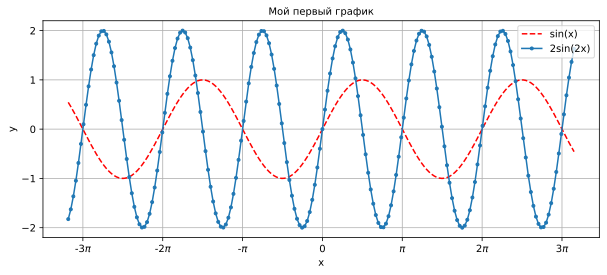

In [23]:
# задаем размеры
plt.figure(figsize=(10,4))

# заголовок 
plt.title('Мой первый график', fontsize=10)

# рисуем графики
plt.plot(x_vals, y_vals_1, linestyle='--', color='r', label='sin(x)')
plt.plot(x_vals, y_vals_2,  marker='.', label='2sin(2x)')

# linestyle: '--' - dashed line style, '-.'- dash-dot line style, ...
# color: r, g, b, ...
# marker: '.', 'o', '+', ...

# сетка графика
plt.grid(True) 

# разметка осей
plt.xticks([math.pi * x for x in range(-3, 4)], ["-3$\pi$", "-2$\pi$", "-$\pi$", "0", "$\pi$", "2$\pi$", "3$\pi$"])
plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)

# легенда
plt.legend(fontsize=10)

plt.show()

# сохранить
#plt.savefig('fig.pdf')

Несколько графиков на одном рисунке:

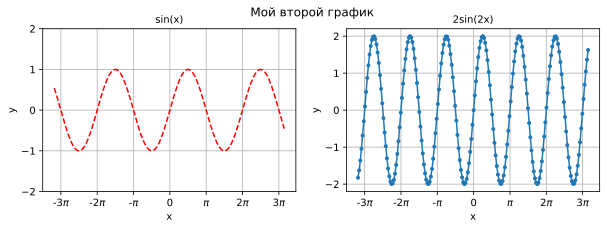

In [24]:
# задаем размеры всей области
plt.figure(figsize=(10,3))

# заголовок ко всему рисунку
plt.suptitle('Мой второй график', fontsize=12)



# 1 область для рисования
plt.subplot(1, 2, 1) 

# заголовок для текущей области 
plt.title('sin(x)',fontsize=10)

# рисуем 1 график
plt.plot(x_vals, y_vals_1, linestyle='--', color='r')

# сетка графика
plt.grid(True) 

# разметка осей
plt.xticks([math.pi * x for x in range(-3, 4)], 
           ['-3$\pi$', '-2$\pi$', '-$\pi$', '0', '$\pi$', '2$\pi$', '3$\pi$'])
plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)



# 2 область для рисования
plt.subplot(1, 2, 2)

# заголовок для текущей области 
plt.title('2sin(2x)',fontsize=10)

# рисуем 2 график
plt.plot(x_vals, y_vals_2,  marker='.')

# сетка графика
plt.grid(True) 

# разметка осей
plt.xticks([math.pi * x for x in range(-3, 4)], 
             ['-3$\pi$', '-2$\pi$', '-$\pi$', '0', '$\pi$', '2$\pi$', '3$\pi$'])
plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)

plt.show()

А можно делать сетку из графиков:

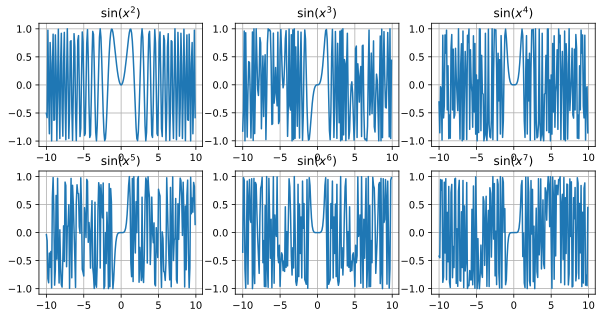

In [25]:
# задаем размеры всей области
plt.figure(figsize=(10,5))

for i in range(1, 7):
    
    #задаем местоположение поля с графиком
    plt.subplot(2, 3, i)
    
    # заголовок для текущей области 
    plt.title(f'sin$(x^{i+1})$')

    # рисуем график в текцщей области
    plt.plot(x_vals, [math.sin(x**(i + 1)) for x in x_vals])

    # сетка графика
    plt.grid(True) 

plt.show()

### Пример:  гистограмма ([plt.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html))

Возьмем два набора по 1000 точек из нормальных распределений с параметрами ($\mu=5, \sigma=2$) и ($\mu=-5, \sigma=5$) и сравним их распределения с помощью гистограмм. Для этого сгенерируем вектора точек с помощью библиотеки numpy, о которой поговорим в следующем разделе.

In [26]:
import numpy as np

In [27]:
x_vals_1 = np.random.normal(5, 2, size=10000)
x_vals_2 = np.random.normal(-5, 5, size=10000)

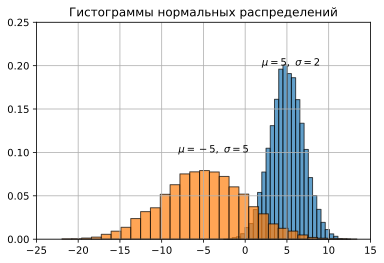

In [28]:
# заголовок 
plt.title('Гистограммы нормальных распределений')

# рисуем графики
plt.hist(x_vals_1, bins=30, alpha=0.7, edgecolor='black', density=True)
plt.hist(x_vals_2, bins=30, alpha=0.7, edgecolor='black', density=True)

# текст на графике
plt.text(2, 0.2, r'$\mu=5,\ \sigma=2$')
plt.text(-8, 0.1, r'$\mu=-5,\ \sigma=5$')

# границы осей
plt.xlim(-25, 15)
plt.ylim(0, 0.25)

# сетка графика
plt.grid(True) 

plt.show()

На что следует обращать внимание при построении гистограммы:
- размер бина (чем больше размер бина, тем более сглаженное распределение будет на графике);
- при построении нескольких гистограмм на одном графике они могут накладываться (]можно увеличить прозрачность).

### Пример:  диаграмма рассеивания ([plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html))

Для того, чтобы понять характер взаимосвязи двух переменных, удобно их изобразить в виде точек на плоскости. Это и делает диаграмма расеивания. Сгенерируем искусственные переменные $x$ и $y$ с зашумленной квадратичной зависимостью.

In [29]:
x_vals = [x * 0.1  for x in range(0, 100)]
y_vals = [x**2 +  np.random.rand() * 10 for x in x_vals]

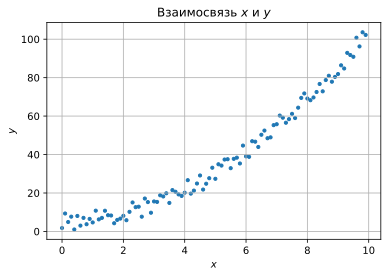

In [30]:
# задаем размеры
plt.figure(figsize=(6,4))

# заголовок 
plt.title('Взаимосвязь $x$ и $y$')

# рисуем график
plt.scatter(x_vals, y_vals, s=10)

# подписи осей
plt.ylabel('$y$')
plt.xlabel('$x$')

# сетка графика
plt.grid(True) 

plt.show()

### Пример:  столбчатая диаграмма ([plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html))

Вспомним про табличные данные из 1 части задания и посмотрим на зависимость кол-ва добавленных фильмов и сериалов от дня недели. В этом нам поможет столбчатая диаграмма.

In [31]:
data.dropna(subset=['date_added'], inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'])
data['day_added'] = data['date_added'].dt.weekday

In [32]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']
days_dict = {i : day for i, day in enumerate(days)}
data = data.replace({'day_added': days_dict}) 

In [33]:
df_movies = data[data.type == 'Movie'].day_added.value_counts()
df_tv_shows = data[data.type == 'TV Show'].day_added.value_counts()

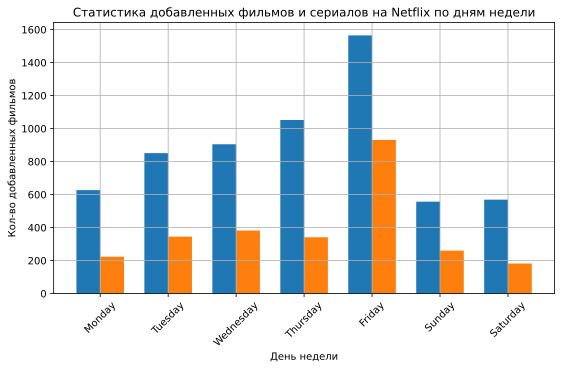

In [34]:
# задаем размеры
plt.figure(figsize=(9,5))

# заголовок 
plt.title('Статистика добавленных фильмов и сериалов на Netflix по дням недели')

# ширина столбцов
width = 0.35

# координаты столбцов
ids = np.arange(1,8)

# рисуем графики
plt.bar(ids - width / 2, df_movies[days].values, width)
plt.bar(ids + width / 2, df_tv_shows[days].values, width)

# метки по оси x
plt.xticks(ids, days, rotation=45)

# подписи осей
plt.xlabel('День недели')
plt.ylabel('Кол-во добавленных фильмов')

# сетка графика
plt.grid(True) 

plt.show()

Можно заметить, что больше всего фильмов и сериалов добавляют на сайт по пятницам :)

## Другие библиотеки: seaborn

**Seaborn** - более высокоуровневая библиотека визуализации данных на базе matplotlib, позволяющая очень быстро строить качественные графики для анализа данных. 

В **seaborn** есть:
* удобная интеграция с pandas;
* полезные для анализа данных шаблоны, реализация которых в matplotlib потребовала бы большого количества кода;
* красивые настройки оформления графиков.

Построим тот же график, что в предыдущем примере, только с помощью библиотект seaborn.

In [35]:
import seaborn as sns

# задает по умолчанию тему оформления графиков
sns.set() 

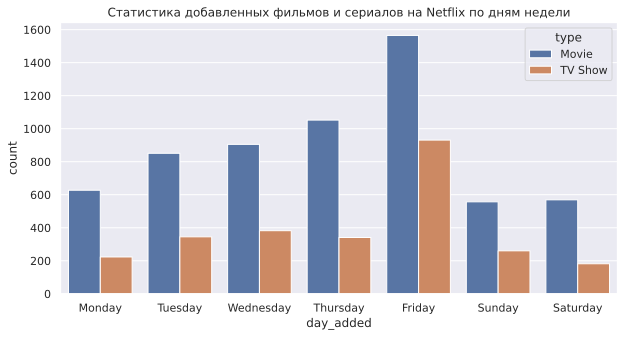

In [36]:
plt.figure(figsize=(10,5))
plt.title('Статистика добавленных фильмов и сериалов на Netflix по дням недели')
sns.countplot(data=data, x='day_added', hue='type', order=days)
plt.show()

Как видим, seaborn помогает избежать промежуточных вычислений и дополнительного оформления графика!

Далее приведем несколько других полезных для анализа данных типов графиков, которые можно быстро построить с помощью seaborn. Другие примеры можно найти в примерах [документации](http://seaborn.pydata.org/).

Стандартные датасеты для анализа данных можно загрузить с помощью встроенной функции load_dataset.

In [37]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
iris.shape

(150, 5)

### jointplot

jointplot объединяет на одном графике диаграмму рассеивания двух количественных переменных и гистограммы их распределений.

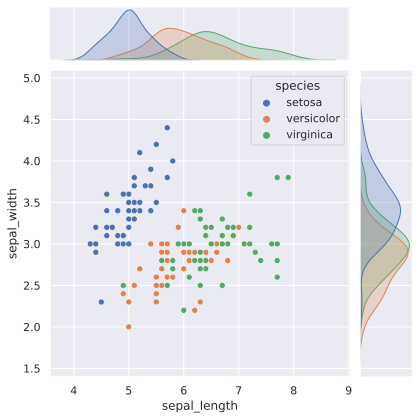

In [39]:
sns.jointplot(data=iris, x="sepal_length", y='sepal_width', hue="species")
plt.show()

### pairplot

pairplot похож на jointplot, но объединяет диаграммы рассеивания и гистограммы распределений сразу для всех количественных переменных в данных.

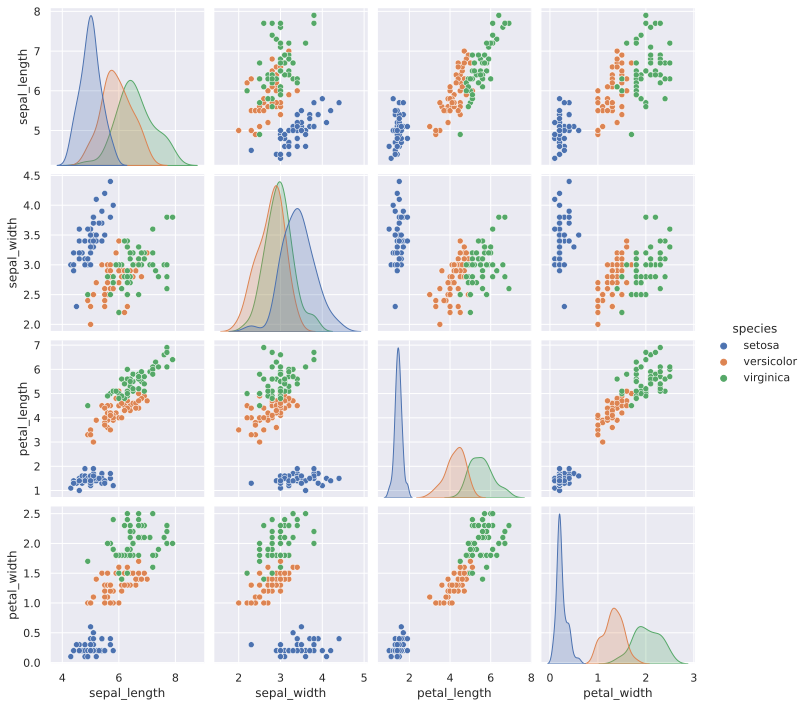

In [40]:
sns.pairplot(iris, hue="species")
plt.show()

### boxplot

boxplot - очень популярный в статистике график, удобный для сравнения нескольких распределений, в частности для анализа влияния категориальной переменной на количественную. 

Каждый box ограничен первым и третим квартилем, а линия посередине обозначает медиану распределения. Границы усов - минимальное и максимальное статистически значимое значение, а ромбы за границами - выбросы. 

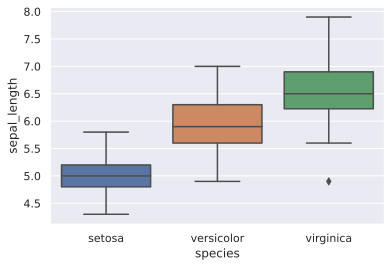

In [41]:
sns.boxplot(x='species', y="sepal_length", data=iris)
plt.show()

### lineplot

lineplot в seaborn похож на обычный поточечный график, но позволяет усреднять несколько значений переменной $y$ для одного значения переменной $x$ и рисовать доверительный интервал.

In [42]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


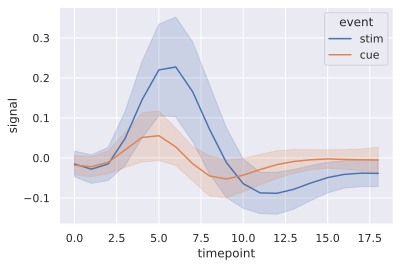

In [43]:
# рисуем среднее и разброс для значений x
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", ci="sd")
plt.show()

## Интерактивная визуализация: plotly

**Plotly** — это  библиотека, которая позволяет строить интерактивные графики в jupyter notebook. С ее помощью можно построить те же типы графиков, как и с помощью предыдущих библиотек. 

Особенность интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мышки, скрыть части визуализации, приблизить участки графика и т.д.

Для работы с табличными данными есть удобный модуль plotly express, позволяющий строить интерактивные графики в одну строку, аналогично seaborn. Убедимся в этом:

In [44]:
import plotly.express as px

In [45]:
fig = px.scatter(iris, x='sepal_length', y='sepal_width',
              color='species')
fig.show()

Детально вы можете ознакомиться с библиотекой с помощью [документации](https://plot.ly/python/).

Далее вам нужно построить несколько визуализаций табличных данных о фильмах и сериалах, с которыми мы работали в 1 части задания. 

### Важно!

* **Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования</font>.**
* **Проверьте, что при конвертации в html формат все графики остаются видны. Это нужно для дальнейшей проверки в проверяющей системе.**
* **При решении заданий вы можете воспользоваться любыми средствами для визуализации.**
* **Все графики должны выглядеть опрятно и соответствовать правилам, перечисленным в начале Части 2. В случае несоответствия хотя бы 3 пунктам оценка снижается на 0.5 балла.**

#### Задание 1 (1.5 балла).  Постройте график (line plot) зависимости кол-ва выпущенных фильмов (в колонке type значениe Movie) от года выпуска .

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    765
2018    767
2019    633
2020    517
2021    277
Length: 73, dtype: int64


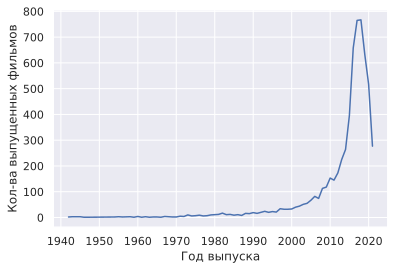

In [46]:
movie_filter = data.query("type == 'Movie'")
print(movie_filter.groupby(['release_year']).size())
movie_year_dict = movie_filter.groupby(['release_year']).size().to_dict()
keys = list(movie_year_dict.keys())
vals = list(movie_year_dict.values())
ax = sns.lineplot(x = keys, y = vals)
ax.set(xlabel='Год выпуска', ylabel='Кол-ва выпущенных фильмов')
plt.show()

#### Задание 2 (1.5 балла). Постройте диаграмму  (bar plot) средней продолжительности фильмов (в колонке type значениe Movie) в зависимости от рейтинга.  

rating
G            90.268293
NC-17       125.000000
NR           94.533333
PG           98.282230
PG-13       108.330612
R           106.720201
TV-14       110.290820
TV-G         79.666667
TV-MA        95.889913
TV-PG        94.851852
TV-Y         48.114504
TV-Y7        66.287770
TV-Y7-FV     68.400000
UR          106.333333
Name: duration, dtype: float64


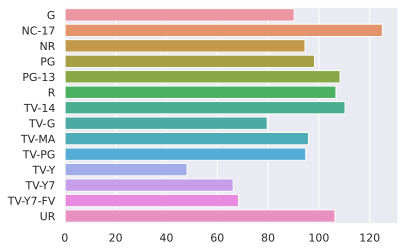

In [47]:
df = data.query("type=='Movie'").groupby('rating').mean('duration')
print(df['duration'])
filter_dict = df['duration'].to_dict()
keys = list(filter_dict.keys())
vals = list(filter_dict.values())
ax = sns.barplot(x=vals, y=keys)

#### Задание 3 (1.5 балла). Постройте график (scatter plot) зависимости продолжительности фильма от года его выпуска (каждому фильму должна соответствовать своя точка на графике).

      duration  release_year
0           90          2020
6           91          2021
7          125          1993
9          104          2021
12         127          2021
...        ...           ...
8801        96          2015
8802       158          2007
8804        88          2009
8805        88          2006
8806       111          2015

[6126 rows x 2 columns]


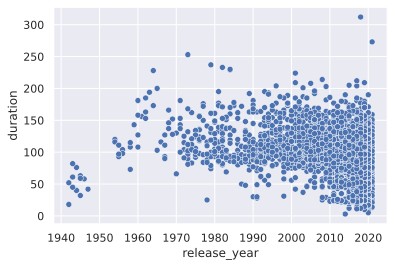

In [48]:
d = data.query("type=='Movie'")[['duration','release_year']].to_dict()
print(data.query("type=='Movie'")[['duration','release_year']])
sns.scatterplot(x=data.query(("type=='Movie'"))['release_year'], y=data.query(("type=='Movie'"))['duration'])

# Часть 3. Numpy

Numpy - библиотека для работы с многомерными массивами данных для Python.

* Функционал библиотека сильно упрощает работу с масиивами по сравению с использованием списков.
* Благодаря транслированию Python-кода в С-код, выполение операций происхоит значительно быстрее.
* Некоторые функции поддерживают распараллеливание на несколько ядер.

Полезные ссылки:
* [Документация](https://numpy.org)
* [Подробное описание с примерами](https://www.tutorialspoint.com/numpy/numpy_advanced_indexing.htm)
* [100 задач на numpy с решениями](https://pythonworld.ru/numpy/100-exercises.html )

Далее рассмотрим базовый функуионал.

In [49]:
import numpy as np

### Создание массива

In [50]:
# из списка
x = [[0,1,2], [3,4,5], [6, 7, 9]]
x = np.array(x)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [51]:
# из нулей
x = np.zeros((3, 2))
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [52]:
# из единиц
x = np.ones((3, 2))
x

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [53]:
# размер массива
# для двумерного массива первая размерность - число строк, вторая - число столбцов
x.shape

(3, 2)

In [54]:
# последовательность с шагом
x = np.arange(1, 10, 2)
x

array([1, 3, 5, 7, 9])

### Базовые операции над массивами

Важно, что в numpy операции над массивами происходят векторизованно для всех элементов массива сразу, причем вычисления столь же эффективны, как в языке C. 

In [55]:
x = np.arange(10)
y = np.arange(15, 5, -1)
x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6]))

In [56]:
# поэлементное сложение
x + y

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [57]:
# поэлементное умножение
x * y

array([ 0, 14, 26, 36, 44, 50, 54, 56, 56, 54])

In [58]:
# поэлементный sin
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [59]:
# нахождение максимума
np.amax(x * y)

56

In [60]:
# нахождение аргмаксимума
np.argmax(x * y)

7

In [61]:
# поэлементное сравнение
x > 5

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [62]:
np.all(x > 5)

False

In [63]:
np.any(x > 5)

True

### Типы и преобразование типов

In [64]:
x = np.arange(15)
x.dtype

dtype('int64')

In [65]:
y = np.array([1.5, 2.5])
y.dtype

dtype('float64')

In [66]:
x = x.astype(np.float64)
x.dtype

dtype('float64')

### Изменение размера массивов

numpy-массивы всегда лежат в памяти последовательно, одним куском, поэтому у массива можно изменять размер практически бесплатно.

In [67]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x, x.shape

(array([[1, 2, 3],
        [4, 5, 6]]), (2, 3))

In [68]:
# вытянуть в вектор
x = x.ravel()
x, x.shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [69]:
# добавить фиктивную размерность
x = x[:, np.newaxis]
x, x.shape

(array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]), (6, 1))

In [70]:
# другой способ добавить фиктивную размерность
x = x.ravel()
x = x.reshape(-1, 1)
x, x.shape

(array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]), (6, 1))

In [71]:
# изменить размерность, идем по строкам
x = x.reshape(3, 2)
x, x.shape

(array([[1, 2],
        [3, 4],
        [5, 6]]), (3, 2))

### Операции над многомерными массивами

In [72]:
x = np.array([[1, 2], [2, 1], [2, 3]])

In [73]:
# транспонирование
x.T

array([[1, 2, 2],
       [2, 1, 3]])

In [74]:
# матричное умножение
y = np.array([[0, 1, 0], [1, 0, 1]])
x.dot(y)

array([[2, 1, 2],
       [1, 2, 1],
       [3, 2, 3]])

In [75]:
# матричное умножение
res = np.dot(x, y)
res, res.shape

(array([[2, 1, 2],
        [1, 2, 1],
        [3, 2, 3]]), (3, 3))

Некоторые из операций можно принять вдоль некоторых размерностей, задав аргумент axis. Как легко запомнить, как работает axis:
* после применения функции получится массив, в котором будет отсутствовать размерность указанная в axis, но остальные размерности будут иметь такие же значения

In [76]:
x, x.shape

(array([[1, 2],
        [2, 1],
        [2, 3]]), (3, 2))

In [77]:
# максимум в каждом столбце
np.amax(x, axis=0)

array([2, 3])

In [78]:
# максимум в каждой строке
np.amax(x, axis=1)

array([2, 2, 3])

In [79]:
# сумма по столбцам
np.sum(x, axis=0)

array([5, 6])

In [80]:
# сумма по строкам
np.sum(x, axis=1)

array([3, 3, 5])

In [81]:
# поставить массивы сбоку друг от друга (по горизонтали)
np.hstack((x, x))

array([[1, 2, 1, 2],
       [2, 1, 2, 1],
       [2, 3, 2, 3]])

In [82]:
# поставить массивы сверху друг на друга (по вертикали)
np.vstack((x, x))

array([[1, 2],
       [2, 1],
       [2, 3],
       [1, 2],
       [2, 1],
       [2, 3]])

In [83]:
# использование масок
mask = x == 1
mask

array([[ True, False],
       [False,  True],
       [False, False]])

In [84]:
x[mask] = -1
x

array([[-1,  2],
       [ 2, -1],
       [ 2,  3]])

Для маски с несколькими условиями использовать логические операнды (например, & или |).

In [85]:
x[(x == -1) | ( x == 2)] = 0
x

array([[0, 0],
       [0, 0],
       [0, 3]])

### Broadcasting

***Обязательно к прочтению!*** Подробное описание: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [86]:
x = np.arange(10)
y = np.arange(5)
x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4]))

Можно складывать только массивы одного размера:

In [88]:
x + y

ValueError: ignored

Или почти одного...

In [89]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [90]:
x[:, np.newaxis] + y[np.newaxis, :]

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13]])

Если два массива имеют размерности (a_1, a_2 .. a_n) и (b_1, b_2 .. b_n) соответственно, то между ними можно проводить почленные операции, если для каждого i выполнено одно из трёх условий:
* либо a_i = b_i
* либо a_i = 1
* либо b_i = 1

### Индексация

In [91]:
x = np.arange(20).reshape((4,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [92]:
# взятие слайса
x[0:3, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14]])

Важное отличие от питоновских списков: при slicing возвращается **view**, а не копия! Это позволяет присваивать значения подматрицам.

In [93]:
# взятие элементов по индексам каждой размерности
x[[0, 1, 3], [1, 4, 3]]

array([ 1,  9, 18])

### View и копирование

In [94]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
y = x
y.shape = (2, 5)
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

View ссылается на те же данные, но позволяет задать другие размерности массива.

In [96]:
x = np.arange(10)
v = x.view()
v.shape = (2, 5)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
v[0, 0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

Если нужно получить копию массива, чтобы не портить переданные данные, пользуйтесь функцией copy()

In [98]:
x = np.arange(10)
y = x.copy()
y[:] = 0
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
np.diag(np.array([[1,2,3], [3,4,5]]))

array([1, 4])

Далее приведены задачи на работу с numpy-массивами. 

## Важно! 
* **Файлы functions.py и functions_vectorized.py с реализованными функциями необходимо <font color='red'>сдать на тестирование</font> в проверяющей системе.**

### Задачи 1-6 (27 баллов).

Для каждой из задач ниже привидите 2 реализации: одна без использования numpy, а вторая полностью векторизованная (без использования циклов/map/list comprehension). Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные — в файл functions_vectorized.py (см. шаблоны). 

Невекторизованная реализация каждой из задач оценивается в __1.5 балла__, векторизованная – в __3 балла__.

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. Если ненулевых элементов на диагонали нет, то вернуть -1.\
  Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.
 

* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True. 
  

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Если нулевых элементов нет, то вернуть -1.  
  Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.
 

* __Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, num_channels), а также вектор весов длины num_channels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). ***Обратите внимание, что в изображении может быть не три канала!*** 


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть два вектора одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. \
    Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – np.array([2, 3, 5]), np.array([3, 3, 1]).
 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. 

__Замечание.__ Можно считать, что все входные данные непустые и коректные.

## Важно! 
* **Задание оценивается по системе <font color='red'>кросс-рецензирования</font>.**

### Задача 7 (3 балла).

*  **(2.5 балла)** Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. Для этого постройте графики времени работы в зависимости от размера данных. 
*  **(0.5 балла) (?)**  Сделайте выводы о времени работы функций.

In [100]:
import functions_vectorised
import functions
import time

In [101]:
import numpy as np

In [102]:
# генерация данных

prod_non_zero_diag_data = []
for n in [10, 100, 1000, 10000]:
    X = np.random.randint(0, 3, (n, n))
    prod_non_zero_diag_data += [X]

are_multisets_equal_data = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, n)
    y = np.random.randint(0, 3, n)
    are_multisets_equal_data += [(x, y)]

max_after_zero_data = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, n)
    max_after_zero_data += [x]

convert_image_data = []
for n in [10, 100, 1000]:
    image = np.random.random((n, n, 10))
    weights = np.random.random(10)
    convert_image_data += [(image, weights)]
     
run_length_encoding_data = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, n)
    run_length_encoding_data += [x]
      
pairwise_distance_data = []
for n in [10, 100, 500]:
    X = np.random.random((n, n))
    Y = np.random.random((n, n))
    pairwise_distance_data += [(X, Y)]

In [103]:
# функция для подсчета времени работы

def count_time(func, *data):
    tick = time.perf_counter() 
    func(*data)
    return time.perf_counter() - tick

/content/functions_vectorised.py:16: RuntimeWarning:

overflow encountered in long_scalars



{'size': [10, 10, 100, 100, 1000, 1000, 10000, 10000], 'time': ['0.008', '0.030', '0.295', '2.973', '0.134', '0.095', '0.037', '0.176'], 'Function': ['unvectorised', 'vectorised', 'unvectorised', 'vectorised', 'unvectorised', 'vectorised', 'unvectorised', 'vectorised']}


Text(0.5, 1.0, 'pairwise_distance')

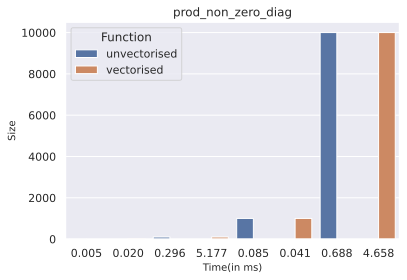

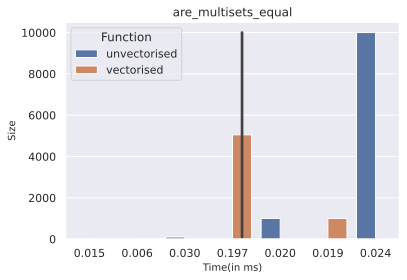

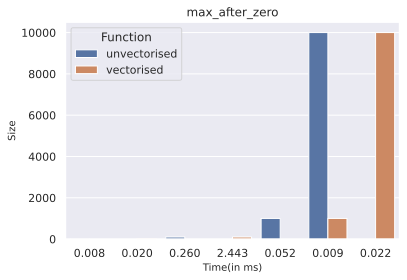

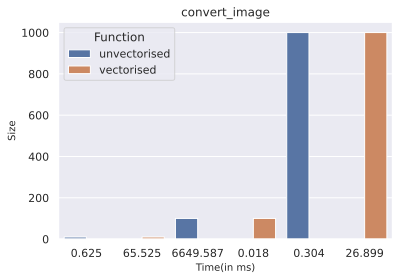

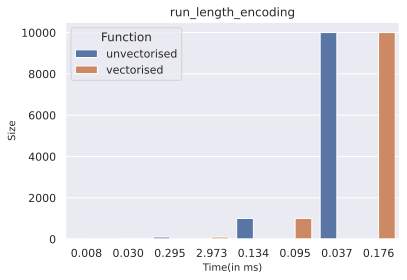

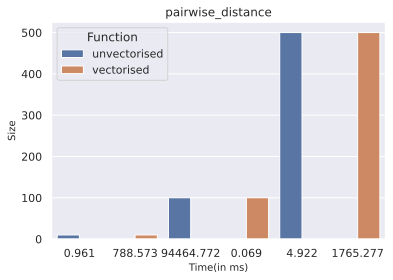

In [347]:
prod_non_zero_diag_time = []
prod_non_zero_diag_vectorised_time = []
are_multisets_equal_time = []
are_multisets_equal_vectorised_time = []
max_after_zero_time = []
max_after_zero_vectorised_time = []
convert_image_time = []
convert_image_vectorised_time = []
rle_time = []
rle_vectorised_time = []
pairwise_distance_time = []
pairwise_distance_vectorised_time = []

for X in prod_non_zero_diag_data:
  prod_non_zero_diag_time += [count_time(functions.prod_non_zero_diag, X.tolist())]
  prod_non_zero_diag_vectorised_time += [count_time(functions_vectorised.prod_non_zero_diag, X)]

for X in are_multisets_equal_data:
  are_multisets_equal_time += [count_time(functions.are_multisets_equal, *X)]
  are_multisets_equal_vectorised_time += [count_time(functions_vectorised.are_multisets_equal, *X)]

for X in max_after_zero_data:
  max_after_zero_time += [count_time(functions.max_after_zero, X.tolist())]
  max_after_zero_vectorised_time += [count_time(functions_vectorised.max_after_zero, X.tolist())]

for X in convert_image_data:
  convert_image_time += [count_time(functions.convert_image, *X)]
  convert_image_vectorised_time += [count_time(functions_vectorised.convert_image, *X)]
  
for X in run_length_encoding_data:
  rle_time += [count_time(functions.run_length_encoding, X.tolist())]
  rle_vectorised_time += [count_time(functions_vectorised.run_length_encoding, X)]

for X in pairwise_distance_data:
  pairwise_distance_time += [count_time(functions.pairwise_distance, *X)]
  pairwise_distance_vectorised_time += [count_time(functions_vectorised.pairwise_distance, *X)]

prod_non_zero_diag_size = [10,10,100,100,1000,1000,10000,10000]
are_multisets_equal_size = [10,10,100, 100,1000, 1000,10000, 10000]
max_after_zero_size = [10,10,100, 100,1000, 1000,10000, 10000]
convert_image_size = [10,10,100, 100,1000, 1000]
rle_size = [10,10, 100,100,1000, 1000,10000, 10000]
pairwise_distance_size = [10,10,100, 100,500, 500]

def converter(L):
  for i in range(0,len(L)):
    L[i] = "{:.3f}".format(float(L[i]*1000))

converter(prod_non_zero_diag_time)
converter(prod_non_zero_diag_vectorised_time)
converter(are_multisets_equal_time)
converter(are_multisets_equal_vectorised_time)
converter(max_after_zero_time)
converter(max_after_zero_vectorised_time)
converter(convert_image_time)
converter(convert_image_vectorised_time)
converter(rle_time)
converter(rle_vectorised_time)
converter(pairwise_distance_time)
converter(pairwise_distance_vectorised_time)

task1 = {'size':prod_non_zero_diag_size,'time':prod_non_zero_diag_time+prod_non_zero_diag_vectorised_time, 'Function':['unvectorised','vectorised']*4}
task2 = {'size':are_multisets_equal_size,'time':are_multisets_equal_time+are_multisets_equal_vectorised_time, 'Function':['unvectorised','vectorised']*4}
task3 = {'size':max_after_zero_size, 'time':max_after_zero_time+max_after_zero_vectorised_time,'Function':['unvectorised','vectorised']*4}
task4 = {'size':convert_image_size, 'time':convert_image_time+convert_image_vectorised_time, 'Function':['unvectorised','vectorised']*3} 
task5 = {'size':rle_size, 'time':rle_time+rle_vectorised_time, 'Function':['unvectorised','vectorised']*4}
task6 = {'size':pairwise_distance_size, 'time': pairwise_distance_time+pairwise_distance_vectorised_time, 'Function':['unvectorised','vectorised']*3}

print(task5)

plot_data1 = pd.DataFrame(task1)
plot_data2 = pd.DataFrame(task2)
plot_data3 = pd.DataFrame(task3)
plot_data4 = pd.DataFrame(task4)
plot_data5 = pd.DataFrame(task5)
plot_data6 = pd.DataFrame(task6)

figure1 = plt.figure()
sns.set_style("darkgrid")
ax1 = sns.barplot(x='time', y='size', hue='Function', data=plot_data1)
plt.xlabel("Time(in ms)", size=10)
plt.ylabel("Size", size=10)
plt.title("prod_non_zero_diag", size=12)

figure2 =plt.figure()
ax2 = sns.barplot(x='time', y='size', hue='Function', data=plot_data2)
plt.xlabel("Time(in ms)", size=10)
plt.ylabel("Size", size=10)
plt.title("are_multisets_equal", size=12)

figure3 =plt.figure()
ax2 = sns.barplot(x='time', y='size', hue='Function', data=plot_data3)
plt.xlabel("Time(in ms)", size=10)
plt.ylabel("Size", size=10)
plt.title("max_after_zero", size=12)

figure4 =plt.figure()
ax2 = sns.barplot(x='time', y='size', hue='Function', data=plot_data4)
plt.xlabel("Time(in ms)", size=10)
plt.ylabel("Size", size=10)
plt.title("convert_image", size=12)

figure5 =plt.figure()
ax2 = sns.barplot(x='time', y='size', hue='Function', data=plot_data5)
plt.xlabel("Time(in ms)", size=10)
plt.ylabel("Size", size=10)
plt.title("run_length_encoding", size=12)

figure6 =plt.figure()
ax2 = sns.barplot(x='time', y='size', hue='Function', data=plot_data6)
plt.xlabel("Time(in ms)", size=10)
plt.ylabel("Size", size=10)
plt.title("pairwise_distance", size=12)


**Выводы**: Vectorised функции намного быстрее работают чем Unvectorised функции с обычными Python данными. В Vectorised функциях используется одна из самых оптимизированных библиотек(numpy). При больших данных ускорение становится более ощутимо